Problem Statement:
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



The chemical compositions are measured as the weight percent in corresponding oxide.

Attribute Information-

 Id number: 1 to 214
 RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type of glass: (class attribute)
1- building_windows_float_processed
2- building_windows_non_float_processed
3- vehicle_windows_float_processed
4- vehicle_windows_non_float_processed (none in this database)
5- containers
6- tableware
7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


Predict : Type of glass

In [136]:
###Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import time
import sklearn


import warnings
warnings.filterwarnings('ignore')

In [2]:
###READING THE CSV FILE
glass=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv',header=None)
coloumn_names=['Id','Ri','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of Glass']
glass=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv',names=coloumn_names)
glass.coloumn=coloumn_names     ###Here we do not have header  in the CSV file so we add header coloumn


In [3]:
glass.head()

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass.shape 

(214, 11)

In [5]:
glass.coloumn   ###checking the coloumn of dataset

['Id', 'Ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of Glass']

In [6]:
glass.dtypes

Id                 int64
Ri               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of Glass      int64
dtype: object

In [7]:
glass.isnull().sum()    ###checking null values

Id               0
Ri               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of Glass    0
dtype: int64

In [8]:
glass.drop(['Id'],axis=1,inplace=True)  ###We drop the Id because it is not important 

In [9]:
glass.describe()   ###statistical analysis

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


From this statistical data we can see it is not in same range,(ie)Si has mean value 72.65 where as Fe has only 0.055 and Ba has 0.17. so we need to normalize the data

<AxesSubplot:xlabel='Type of Glass', ylabel='count'>

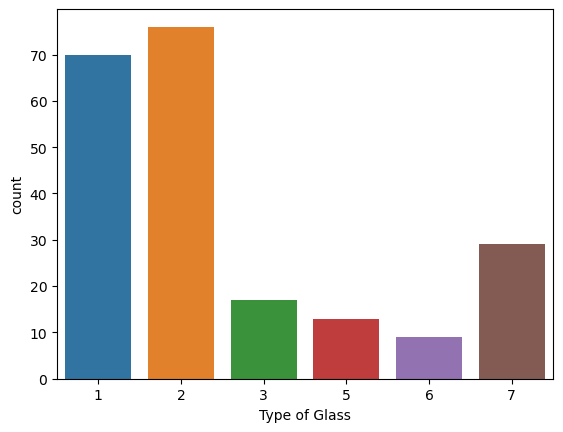

In [10]:
###EDA(Exploratory data analysis)

import seaborn as sns
sns.countplot(x='Type of Glass',data=glass)


In [11]:
glass['Ri'].unique()

array([1.52101, 1.51761, 1.51618, 1.51766, 1.51742, 1.51596, 1.51743,
       1.51756, 1.51918, 1.51755, 1.51571, 1.51763, 1.51589, 1.51748,
       1.51784, 1.52196, 1.51911, 1.51735, 1.5175 , 1.51966, 1.51736,
       1.51751, 1.5172 , 1.51764, 1.51793, 1.51721, 1.51768, 1.51747,
       1.51775, 1.51753, 1.51783, 1.51567, 1.51909, 1.51797, 1.52213,
       1.51779, 1.5221 , 1.51786, 1.519  , 1.51869, 1.52667, 1.52223,
       1.51898, 1.5232 , 1.51926, 1.51808, 1.51837, 1.51778, 1.51769,
       1.51215, 1.51824, 1.51754, 1.51905, 1.51977, 1.52172, 1.52227,
       1.52099, 1.52152, 1.523  , 1.51574, 1.51848, 1.51593, 1.51631,
       1.5159 , 1.51645, 1.51627, 1.51613, 1.51592, 1.51646, 1.51594,
       1.51409, 1.51625, 1.51569, 1.5164 , 1.51841, 1.51605, 1.51588,
       1.51629, 1.5186 , 1.51689, 1.51811, 1.51655, 1.5173 , 1.5182 ,
       1.52725, 1.5241 , 1.52475, 1.53125, 1.53393, 1.52222, 1.51818,
       1.52664, 1.52739, 1.52777, 1.51892, 1.51847, 1.51846, 1.51829,
       1.51708, 1.51

In [12]:
glass['Na'].unique()

array([13.64, 13.89, 13.53, 13.21, 13.27, 12.79, 13.3 , 13.15, 14.04,
       13.  , 12.72, 12.8 , 12.88, 12.86, 12.61, 12.81, 12.68, 14.36,
       13.9 , 13.02, 12.82, 14.77, 12.78, 13.38, 12.98, 12.87, 12.56,
       13.08, 12.65, 12.84, 12.85, 12.57, 12.69, 13.29, 12.74, 14.21,
       12.71, 13.73, 12.73, 13.49, 13.19, 13.99, 13.58, 13.72, 13.2 ,
       13.43, 13.14, 12.45, 12.99, 13.48, 13.39, 13.6 , 13.81, 13.51,
       14.17, 13.69, 13.05, 13.12, 13.31, 14.86, 13.09, 13.34, 13.44,
       13.92, 13.25, 13.41, 14.25, 13.36, 13.24, 13.4 , 13.01, 12.55,
       12.93, 12.9 , 12.2 , 12.67, 12.96, 12.75, 12.35, 12.62, 13.8 ,
       13.83, 11.45, 10.73, 12.3 , 14.43, 11.23, 11.02, 12.64, 13.46,
       13.1 , 13.56, 13.23, 12.94, 13.78, 13.55, 13.98, 13.75, 13.7 ,
       13.71, 13.33, 12.89, 13.65, 12.16, 14.32, 13.42, 13.04, 14.03,
       13.5 , 14.19, 14.01, 11.56, 11.03, 12.97, 14.  , 13.79, 14.46,
       14.09, 14.4 , 14.99, 14.15, 14.56, 17.38, 15.79, 13.88, 14.85,
       14.2 , 14.75,

In [13]:
glass['Mg'].unique()

array([4.49, 3.6 , 3.55, 3.69, 3.62, 3.61, 3.58, 3.46, 3.66, 3.43, 3.56,
       3.59, 3.54, 3.67, 3.85, 3.73, 3.75, 3.57, 3.5 , 3.48, 3.52, 3.49,
       3.47, 3.45, 3.53, 3.82, 3.42, 3.39, 3.84, 3.37, 3.7 , 3.77, 3.35,
       3.72, 3.33, 2.87, 2.84, 2.81, 2.71, 3.74, 3.86, 3.81, 3.65, 3.87,
       3.09, 3.44, 3.41, 3.34, 3.25, 2.88, 2.96, 2.85, 2.72, 2.76, 3.15,
       2.9 , 0.  , 3.83, 3.97, 3.89, 3.9 , 3.68, 3.64, 3.76, 2.28, 2.09,
       1.35, 1.01, 3.98, 3.93, 3.8 , 3.63, 3.51, 3.18, 3.4 , 3.36, 3.78,
       2.68, 1.85, 1.88, 1.71, 1.61, 0.33, 2.39, 2.41, 2.24, 2.19, 1.74,
       0.78, 3.2 , 3.26, 2.2 , 1.83, 1.78])

In [14]:
glass['Al'].unique()

array([1.1 , 1.36, 1.54, 1.29, 1.24, 1.62, 1.14, 1.05, 1.37, 1.56, 1.27,
       1.4 , 1.31, 1.23, 1.16, 0.89, 1.18, 1.69, 1.49, 0.29, 1.35, 1.15,
       1.21, 1.41, 1.33, 1.43, 1.28, 1.3 , 1.38, 1.34, 1.32, 0.47, 1.12,
       1.2 , 0.72, 1.19, 0.71, 0.79, 0.51, 1.17, 1.11, 0.88, 0.78, 0.9 ,
       0.87, 0.82, 1.74, 1.52, 1.57, 1.51, 1.25, 1.9 , 2.12, 1.55, 2.08,
       1.47, 1.48, 1.87, 1.45, 1.58, 1.06, 1.71, 1.44, 1.63, 0.83, 0.66,
       1.88, 2.1 , 1.  , 0.56, 0.77, 0.75, 0.67, 1.26, 1.81, 1.53, 1.67,
       1.08, 1.64, 1.61, 1.07, 1.79, 1.76, 0.65, 1.22, 0.58, 0.91, 3.5 ,
       1.86, 1.65, 1.83, 3.04, 3.02, 2.17, 1.66, 2.09, 0.34, 2.22, 2.06,
       2.38, 2.79, 2.  , 1.98, 2.68, 2.54, 2.34, 2.66, 2.51, 2.25, 2.42,
       1.99, 2.27, 1.8 , 1.82, 2.74, 2.88, 2.02, 1.94])

In [15]:
glass['Si'].unique()

array([71.78, 72.73, 72.99, 72.61, 73.08, 72.97, 73.09, 73.24, 72.08,
       73.2 , 73.01, 73.28, 73.21, 73.29, 73.11, 71.36, 72.12, 72.75,
       72.02, 72.79, 73.02, 72.85, 73.  , 72.64, 73.04, 73.15, 72.86,
       73.27, 73.39, 72.95, 72.74, 71.81, 72.96, 71.77, 73.03, 72.76,
       71.76, 71.95, 72.72, 71.57, 71.99, 71.75, 72.36, 72.84, 72.98,
       73.7 , 71.72, 71.79, 71.35, 72.01, 71.96, 72.22, 72.32, 72.2 ,
       71.87, 73.1 , 72.87, 73.12, 72.39, 72.83, 72.88, 72.66, 73.17,
       72.81, 72.28, 73.25, 72.65, 72.89, 73.23, 73.06, 73.26, 72.26,
       72.34, 73.55, 72.92, 73.81, 70.57, 71.15, 72.19, 69.81, 70.16,
       72.67, 74.45, 72.55, 72.44, 72.38, 72.33, 72.06, 72.53, 72.45,
       72.4 , 72.52, 72.51, 72.18, 71.24, 72.49, 72.78, 73.07, 73.36,
       73.14, 72.54, 72.57, 72.77, 72.7 , 72.48, 71.5 , 72.69, 72.04,
       71.94, 72.14, 69.89, 73.44, 73.75, 73.88, 70.48, 70.7 , 72.25,
       72.37, 74.55, 72.5 , 73.48, 75.41, 71.25, 70.26, 70.43, 73.46,
       73.05, 73.5 ,

In [16]:
glass['K'].unique()

array([0.06, 0.48, 0.39, 0.57, 0.55, 0.64, 0.58, 0.56, 0.67, 0.6 , 0.69,
       0.54, 0.61, 0.15, 0.03, 0.59, 0.62, 0.5 , 0.65, 0.51, 0.11, 0.17,
       0.02, 0.13, 0.09, 0.14, 0.12, 0.23, 0.  , 0.18, 0.19, 0.16, 0.72,
       0.66, 0.37, 0.68, 1.1 , 0.45, 0.38, 0.63, 0.44, 0.07, 0.73, 0.7 ,
       0.35, 0.08, 0.81, 0.1 , 0.49, 0.53, 0.33, 0.52, 1.68, 0.47, 0.97,
       0.32, 6.21, 0.76, 1.76, 1.46, 0.31, 0.04, 0.05, 2.7 , 1.41])

In [17]:
glass['Ca'].unique()

array([ 8.75,  7.83,  7.78,  8.22,  8.07,  8.17,  8.24,  8.3 ,  8.4 ,
        8.09,  8.56,  8.05,  8.38,  8.5 ,  8.39,  8.7 ,  9.15,  8.89,
        8.44,  8.52,  9.  ,  8.59,  8.43,  8.53,  8.54,  8.49,  8.69,
        8.55,  8.57,  8.78,  8.68,  9.57,  8.77,  8.64,  9.74,  8.76,
        8.83,  9.82, 10.02,  8.91, 10.06,  9.14,  9.03,  9.07,  9.02,
        9.06,  8.35,  8.03,  8.27,  8.67,  9.54,  9.69,  9.61,  9.4 ,
        9.85, 10.17,  7.36,  8.32,  7.89,  7.9 ,  7.96,  8.04,  7.94,
        7.97,  7.86,  8.1 ,  7.08,  8.21,  8.08,  8.12,  8.96,  8.6 ,
        9.13,  8.9 ,  8.79,  9.23,  9.42, 11.64, 10.79, 13.24, 13.3 ,
       16.19, 11.52, 10.99, 14.68, 14.96, 14.4 ,  8.28,  8.31,  7.88,
        8.42,  7.99, 10.56, 11.14, 13.44,  8.15,  8.11,  8.41,  8.23,
        8.18,  8.81,  8.33,  9.49,  8.93,  8.58,  8.65,  9.65,  8.99,
        5.87, 10.09, 11.41, 11.62, 11.53, 11.32, 12.24,  6.96,  6.93,
       12.5 ,  9.7 , 11.27,  9.77,  9.26,  9.32,  7.59,  9.95, 10.88,
       11.22,  6.65,

In [18]:
glass['Ba'].unique()

array([0.  , 0.09, 0.11, 0.69, 0.14, 3.15, 0.27, 0.06, 0.15, 2.2 , 0.24,
       1.19, 1.63, 1.68, 0.76, 0.64, 0.4 , 1.59, 1.57, 0.61, 0.81, 0.66,
       0.53, 0.63, 0.56, 1.71, 0.67, 1.55, 1.38, 2.88, 0.54, 1.06, 1.64,
       1.67])

In [19]:
glass['Fe'].unique()

array([0.  , 0.26, 0.11, 0.24, 0.17, 0.07, 0.19, 0.14, 0.22, 0.06, 0.3 ,
       0.16, 0.1 , 0.09, 0.31, 0.03, 0.12, 0.32, 0.15, 0.2 , 0.34, 0.28,
       0.08, 0.29, 0.21, 0.18, 0.25, 0.35, 0.37, 0.51, 0.05, 0.01])

In [20]:
glass['Type of Glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

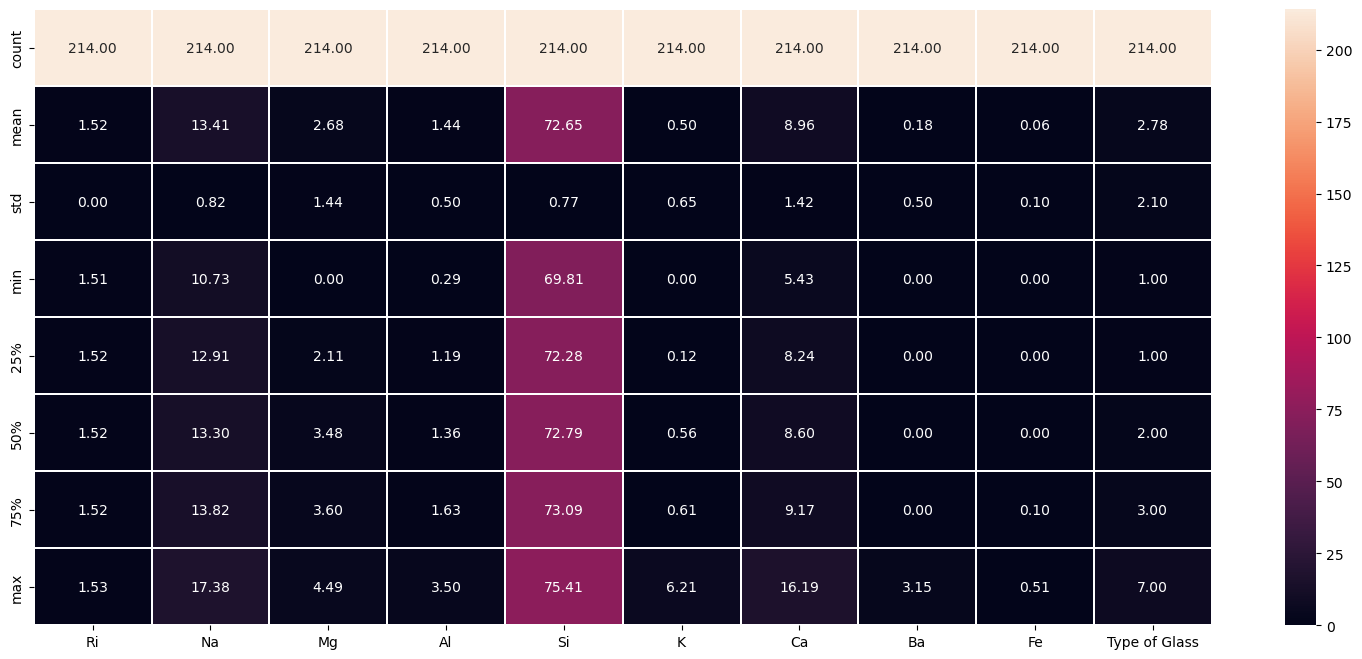

In [21]:
plt.figure(figsize=(19,8))
sns.heatmap(glass.describe(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

we can see skewness in the dataset

In [22]:
glass.corr()['Type of Glass'].sort_values()

Mg              -0.744993
Fe              -0.188278
Ri              -0.164237
K               -0.010054
Ca               0.000952
Si               0.151565
Na               0.502898
Ba               0.575161
Al               0.598829
Type of Glass    1.000000
Name: Type of Glass, dtype: float64

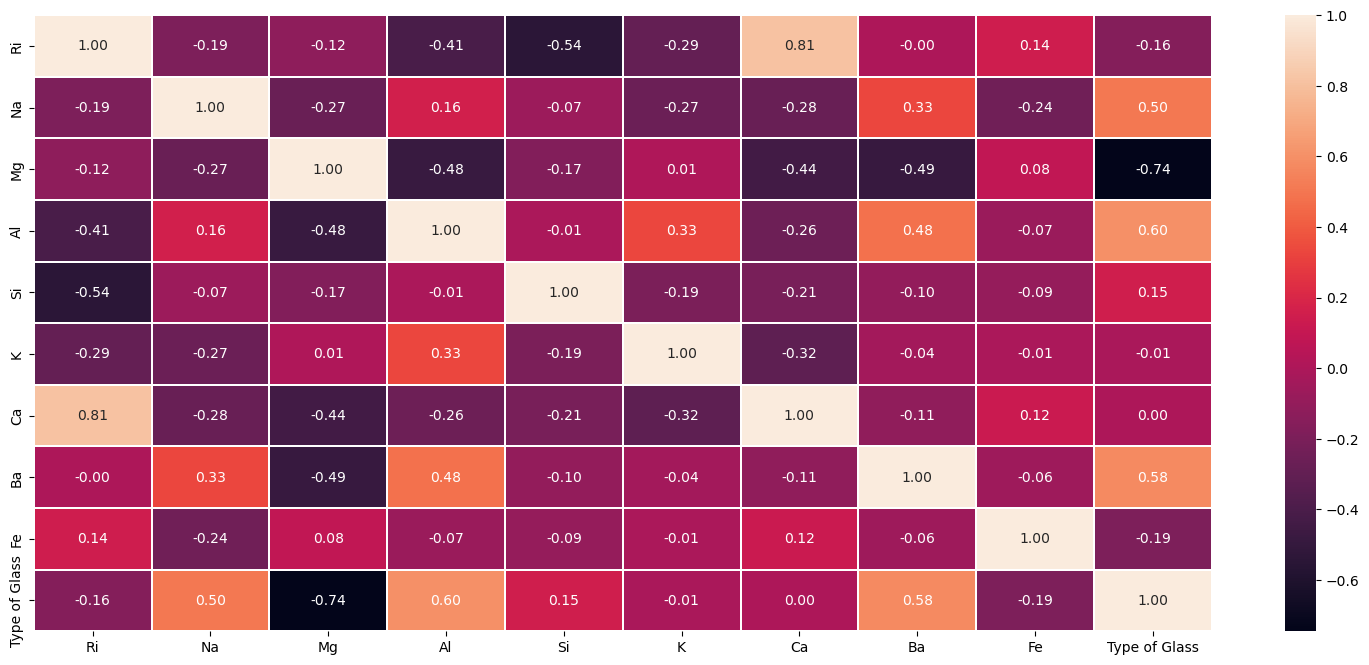

In [23]:
plt.figure(figsize=(19,8))
sns.heatmap(glass.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

Observation from heat map:we can see mg is highly corelated with target variable.

<AxesSubplot:>

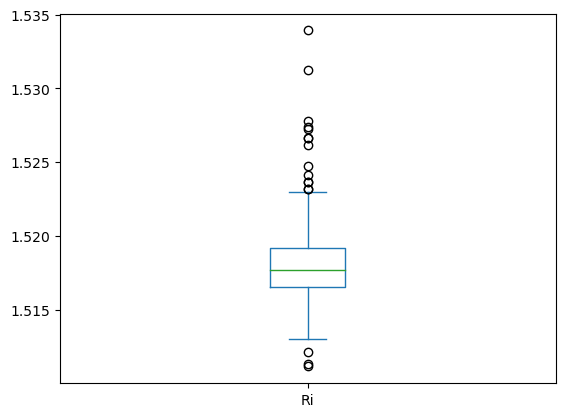

In [24]:
glass["Ri"].plot.box()

<AxesSubplot:>

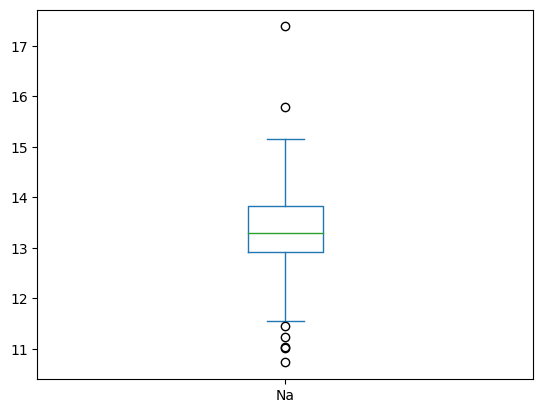

In [25]:
glass["Na"].plot.box()

<AxesSubplot:>

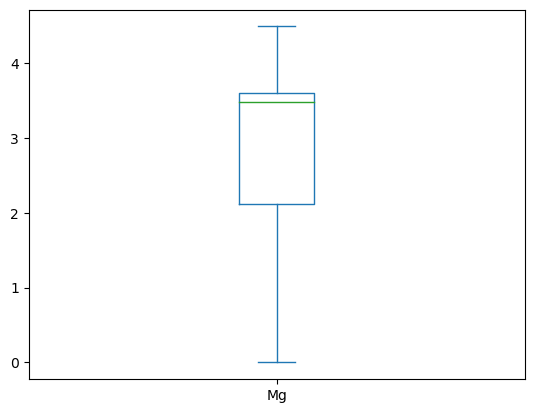

In [26]:
glass["Mg"].plot.box()

<AxesSubplot:>

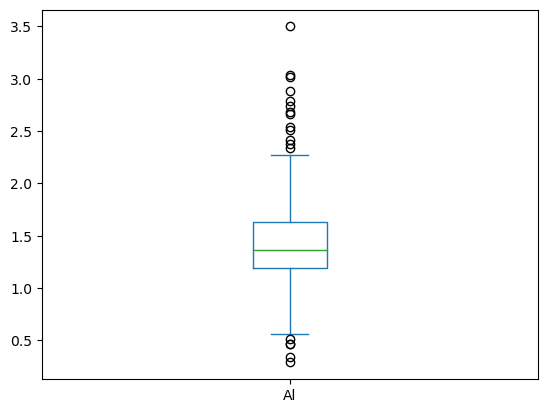

In [27]:
glass["Al"].plot.box()

<AxesSubplot:>

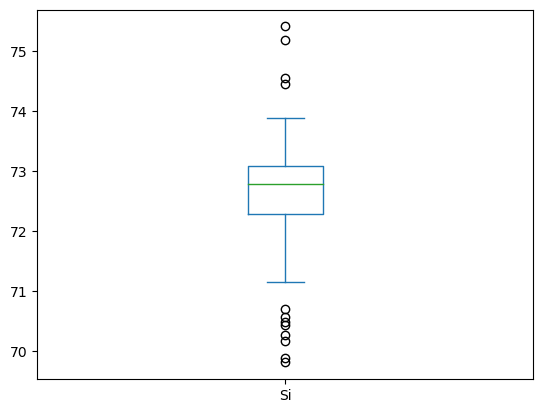

In [28]:
glass["Si"].plot.box()

<AxesSubplot:>

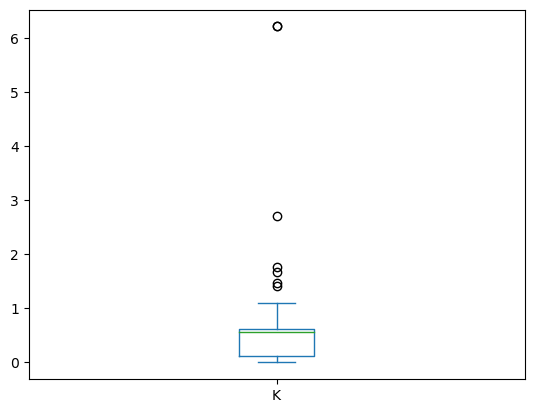

In [29]:
glass["K"].plot.box()

<AxesSubplot:>

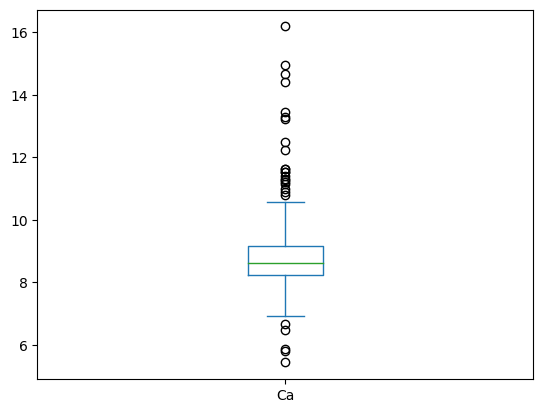

In [30]:
glass["Ca"].plot.box()

<AxesSubplot:>

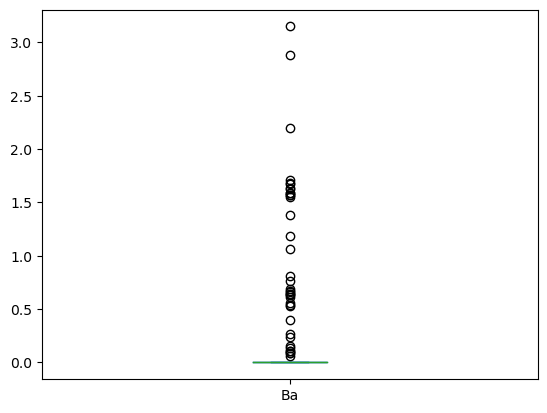

In [31]:
glass["Ba"].plot.box()

<AxesSubplot:>

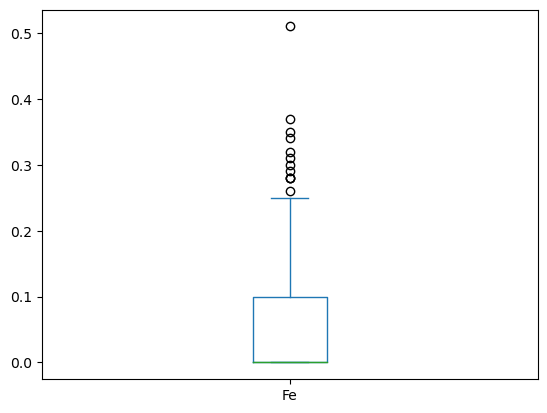

In [32]:
glass["Fe"].plot.box()

Ri                  AxesSubplot(0.125,0.53;0.110714x0.35)
Na               AxesSubplot(0.257857,0.53;0.110714x0.35)
Mg               AxesSubplot(0.390714,0.53;0.110714x0.35)
Al               AxesSubplot(0.523571,0.53;0.110714x0.35)
Si               AxesSubplot(0.656429,0.53;0.110714x0.35)
K                AxesSubplot(0.789286,0.53;0.110714x0.35)
Ca                  AxesSubplot(0.125,0.11;0.110714x0.35)
Ba               AxesSubplot(0.257857,0.11;0.110714x0.35)
Fe               AxesSubplot(0.390714,0.11;0.110714x0.35)
Type of Glass    AxesSubplot(0.523571,0.11;0.110714x0.35)
dtype: object

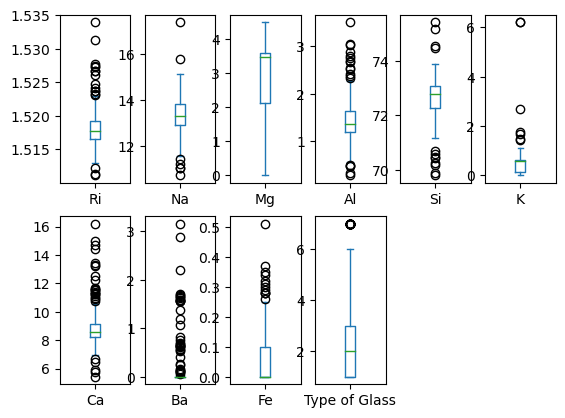

In [33]:
glass.plot(kind="box",subplots=True,layout=(2,6))

we can see outliers in most of the dataset

In [34]:
from scipy.stats import zscore

In [35]:
z=np.abs(zscore(glass))

In [36]:
z

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,0.872868,0.284953,1.254639,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451,0.848275
1,0.249333,0.591817,0.636168,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451,0.848275
2,0.721318,0.149933,0.601422,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451,0.848275
3,0.232831,0.242853,0.698710,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451,0.848275
4,0.312045,0.169205,0.650066,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451,0.848275
...,...,...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,1.865511,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451,2.010478
210,0.500178,1.856097,1.865511,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451,2.010478
211,0.754046,1.168721,1.865511,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451,2.010478
212,0.612399,1.193270,1.865511,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451,2.010478


In [37]:
np.where(z>3)

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
        131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
        188, 189, 201, 201, 203, 207, 213], dtype=int64),
 array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
        5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))

In [38]:
dfn=glass[(z<3).all(axis=1)]

In [39]:
dfn.shape

(194, 10)

percentage loss of data=(214-194)/214*100=9.34% it is acceptable

# SKEWNESS REMOVAL

In [40]:
glass=dfn

In [43]:
glass.skew().sort_values()

Mg              -1.528849
Si              -0.425450
K                0.303175
Na               0.371482
Al               0.658259
Ri               0.952733
Ca               1.077962
Type of Glass    1.284007
Fe               1.486479
Ba               3.188587
dtype: float64

WE CAN SEE Ca,Fe,Ba have more skewness where Mg,Si have negative skewness

<AxesSubplot:xlabel='Ri', ylabel='Density'>

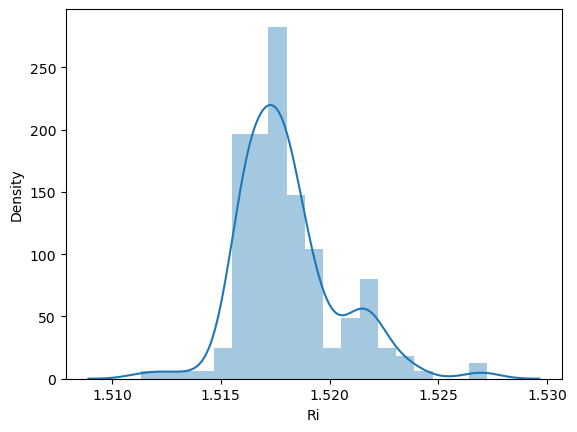

In [45]:
sns.distplot(glass["Ri"])

<AxesSubplot:xlabel='Na', ylabel='Density'>

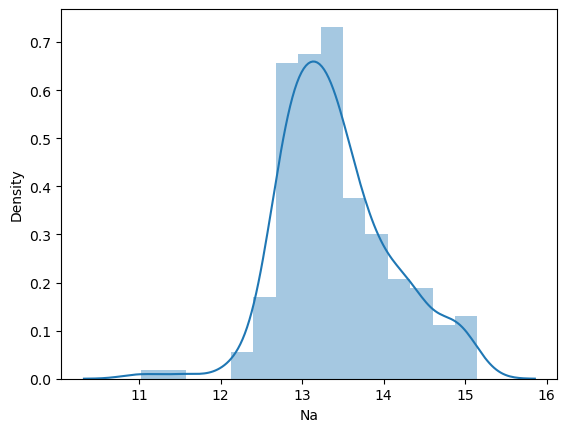

In [46]:
sns.distplot(glass["Na"])

<AxesSubplot:xlabel='Mg', ylabel='Density'>

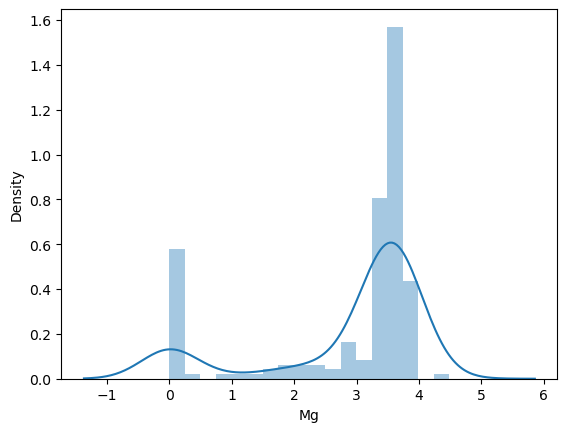

In [47]:
sns.distplot(glass["Mg"])

<AxesSubplot:xlabel='Al', ylabel='Density'>

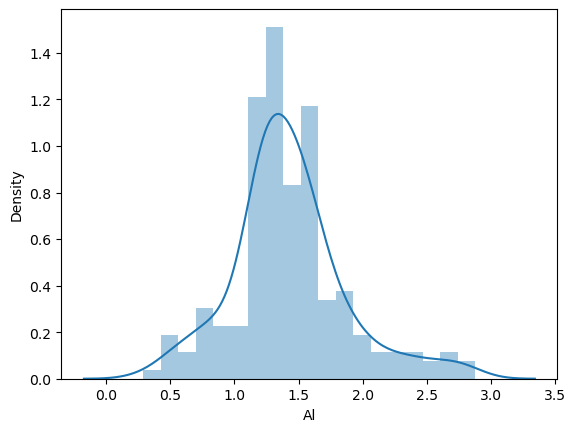

In [48]:
sns.distplot(glass["Al"])

<AxesSubplot:xlabel='Si', ylabel='Density'>

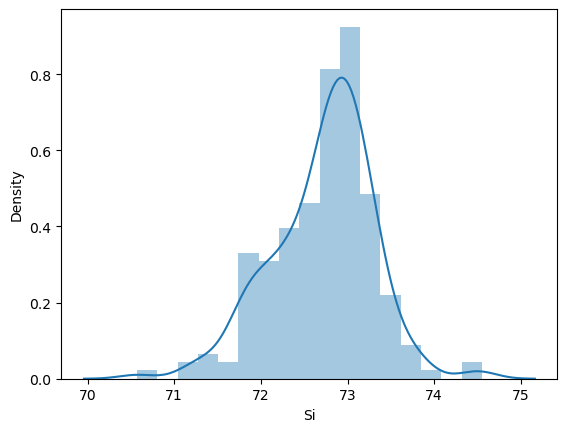

In [49]:
sns.distplot(glass["Si"])

<AxesSubplot:xlabel='K', ylabel='Density'>

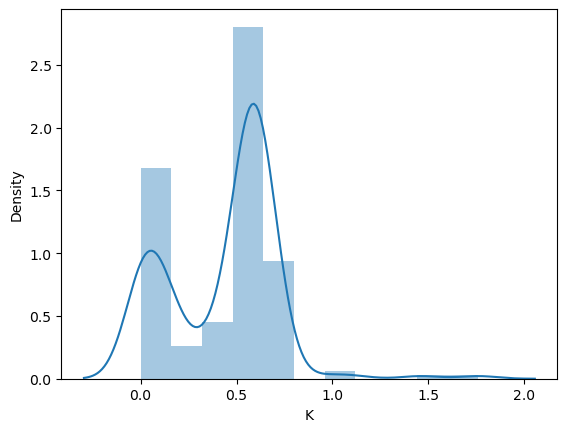

In [50]:
sns.distplot(glass["K"])

<AxesSubplot:xlabel='Ca', ylabel='Density'>

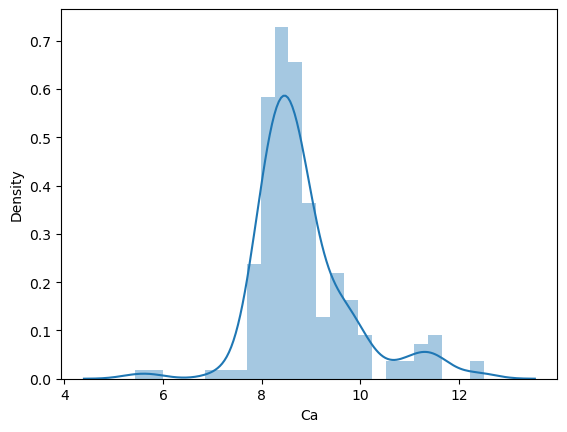

In [51]:
sns.distplot(glass["Ca"])

<AxesSubplot:xlabel='Ba', ylabel='Density'>

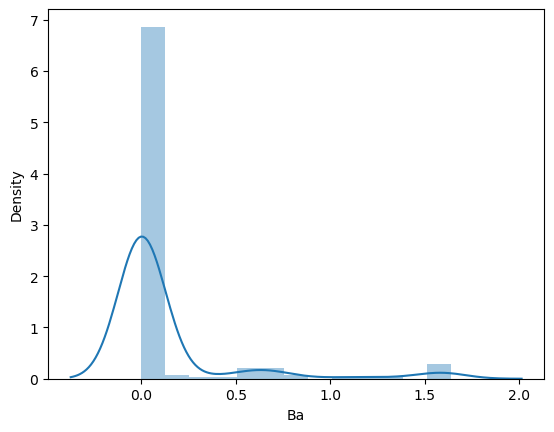

In [52]:
sns.distplot(glass["Ba"])

<AxesSubplot:xlabel='Fe', ylabel='Density'>

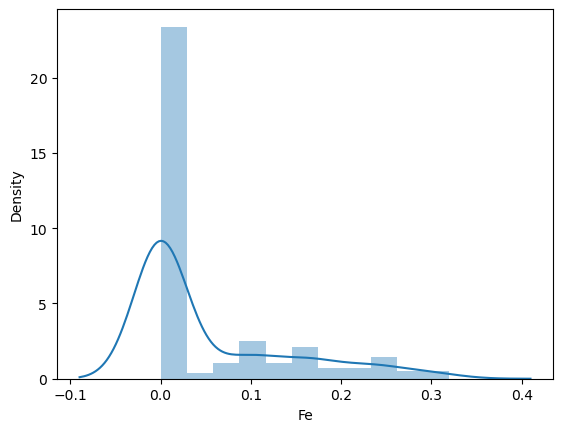

In [53]:
sns.distplot(glass["Fe"])

In [54]:
glass.skew().sort_values()

Mg              -1.528849
Si              -0.425450
K                0.303175
Na               0.371482
Al               0.658259
Ri               0.952733
Ca               1.077962
Type of Glass    1.284007
Fe               1.486479
Ba               3.188587
dtype: float64

Here,we can see Ba has more skewness.

# Splitting Feature and Target

In [55]:
x=glass.drop("Type of Glass",axis=1)
y=glass["Type of Glass"]

In [56]:
x

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0


In [57]:
y

0      1
1      1
2      1
3      1
4      1
      ..
208    7
209    7
210    7
211    7
212    7
Name: Type of Glass, Length: 194, dtype: int64

##To remove skewness we use power transform method

In [60]:
from sklearn.preprocessing import power_transform,PowerTransformer

In [61]:
pt=PowerTransformer()

In [62]:
x_new_pt=pt.fit_transform(x)

In [63]:
x_new_pt

array([[ 0.00000000e+00,  3.75144846e-01,  2.29506682e+00, ...,
         1.11819938e-03, -4.29499500e-01, -6.77737203e-01],
       [ 0.00000000e+00,  7.32539190e-01,  5.87338331e-01, ...,
        -1.05715663e+00, -4.29499500e-01, -6.77737203e-01],
       [ 0.00000000e+00,  2.14037622e-01,  5.07711174e-01, ...,
        -1.11977966e+00, -4.29499500e-01, -6.77737203e-01],
       ...,
       [ 0.00000000e+00,  2.08782892e+00, -1.94767390e+00, ...,
        -3.81688285e-01,  2.49873753e+00, -6.77737203e-01],
       [ 0.00000000e+00,  1.37327598e+00, -1.94767390e+00, ...,
        -3.36777926e-01,  2.49875343e+00, -6.77737203e-01],
       [ 0.00000000e+00,  1.39968197e+00, -1.94767390e+00, ...,
        -2.92174639e-01,  2.49873007e+00, -6.77737203e-01]])

In [64]:
x_new=power_transform(x)

In [65]:
x_new

array([[ 0.00000000e+00,  3.75144846e-01,  2.29506682e+00, ...,
         1.11819938e-03, -4.29499500e-01, -6.77737203e-01],
       [ 0.00000000e+00,  7.32539190e-01,  5.87338331e-01, ...,
        -1.05715663e+00, -4.29499500e-01, -6.77737203e-01],
       [ 0.00000000e+00,  2.14037622e-01,  5.07711174e-01, ...,
        -1.11977966e+00, -4.29499500e-01, -6.77737203e-01],
       ...,
       [ 0.00000000e+00,  2.08782892e+00, -1.94767390e+00, ...,
        -3.81688285e-01,  2.49873753e+00, -6.77737203e-01],
       [ 0.00000000e+00,  1.37327598e+00, -1.94767390e+00, ...,
        -3.36777926e-01,  2.49875343e+00, -6.77737203e-01],
       [ 0.00000000e+00,  1.39968197e+00, -1.94767390e+00, ...,
        -2.92174639e-01,  2.49873007e+00, -6.77737203e-01]])

In [66]:
x=power_transform(x,method='yeo-johnson')

In [67]:
x

array([[ 0.00000000e+00,  3.75144846e-01,  2.29506682e+00, ...,
         1.11819938e-03, -4.29499500e-01, -6.77737203e-01],
       [ 0.00000000e+00,  7.32539190e-01,  5.87338331e-01, ...,
        -1.05715663e+00, -4.29499500e-01, -6.77737203e-01],
       [ 0.00000000e+00,  2.14037622e-01,  5.07711174e-01, ...,
        -1.11977966e+00, -4.29499500e-01, -6.77737203e-01],
       ...,
       [ 0.00000000e+00,  2.08782892e+00, -1.94767390e+00, ...,
        -3.81688285e-01,  2.49873753e+00, -6.77737203e-01],
       [ 0.00000000e+00,  1.37327598e+00, -1.94767390e+00, ...,
        -3.36777926e-01,  2.49875343e+00, -6.77737203e-01],
       [ 0.00000000e+00,  1.39968197e+00, -1.94767390e+00, ...,
        -2.92174639e-01,  2.49873007e+00, -6.77737203e-01]])

In [68]:
pd.DataFrame(x).skew().sort_values(ascending=True)

2   -1.026009
6   -0.081738
1   -0.016968
0    0.000000
5    0.013983
3    0.014042
4    0.036397
8    0.858856
7    1.971225
dtype: float64

In [69]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [70]:
x.mean()

0.3784221159727199

In [71]:
y.value_counts()

1    70
2    68
7    23
3    16
5     9
6     8
Name: Type of Glass, dtype: int64

In [72]:
y=glass['Type of Glass'].apply(lambda y_value:1 if y_value<=4 else 0)
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
208    0
209    0
210    0
211    0
212    0
Name: Type of Glass, Length: 194, dtype: int64


In [75]:
y.value_counts()  ##we seperate window glss(1-4),non-window glass(5-7)

1    154
0     40
Name: Type of Glass, dtype: int64

# Evaluation with algorithm

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [77]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The Model performs well")
        print("At random state:",i)
        print("Training accuracy score is:--",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy score is:--",accuracy_score(y_test,pred_test)*100,'\n')

At random state 93 The Model performs well
At random state: 93
Training accuracy score is:-- 92.25806451612904
Testing accuracy score is:-- 92.3076923076923 



# Training and Testing of data

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=93)

In [80]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.33      0.09      0.14        11
           1       0.72      0.93      0.81        28

    accuracy                           0.69        39
   macro avg       0.53      0.51      0.48        39
weighted avg       0.61      0.69      0.62        39



In [90]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:--",j)
    print("cross validation score is:--",lsc*100)
    print ("Accuracy score is:--",lss*100)
    print("\n")
    

At cv:-- 2
cross validation score is:-- 88.65979381443299
Accuracy score is:-- 92.3076923076923


At cv:-- 3
cross validation score is:-- 89.20673076923077
Accuracy score is:-- 92.3076923076923


At cv:-- 4
cross validation score is:-- 88.7436224489796
Accuracy score is:-- 92.3076923076923


At cv:-- 5
cross validation score is:-- 89.21727395411607
Accuracy score is:-- 92.3076923076923


At cv:-- 6
cross validation score is:-- 89.80429292929294
Accuracy score is:-- 92.3076923076923


At cv:-- 7
cross validation score is:-- 89.24792139077853
Accuracy score is:-- 92.3076923076923


At cv:-- 8
cross validation score is:-- 90.29166666666667
Accuracy score is:-- 92.3076923076923


At cv:-- 9
cross validation score is:-- 89.82683982683982
Accuracy score is:-- 92.3076923076923




In [91]:
lsscore_selected=cross_val_score(lr,x,y,cv=8).mean()
print("The CV score is:--",lsscore_selected,"\n The accuracy score is:",lss)

The CV score is:-- 0.9029166666666667 
 The accuracy score is: 0.9230769230769231


In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
model2=DecisionTreeClassifier()

In [94]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [95]:
model_2_train_pred=model2.predict(x_train)

In [96]:
model_2_test_pred=model2.predict(x_test)

In [97]:
print(classification_report(y_train,model_2_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00       126

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



In [98]:
print(classification_report(y_test,model_2_test_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.96      0.98        28

    accuracy                           0.97        39
   macro avg       0.96      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39



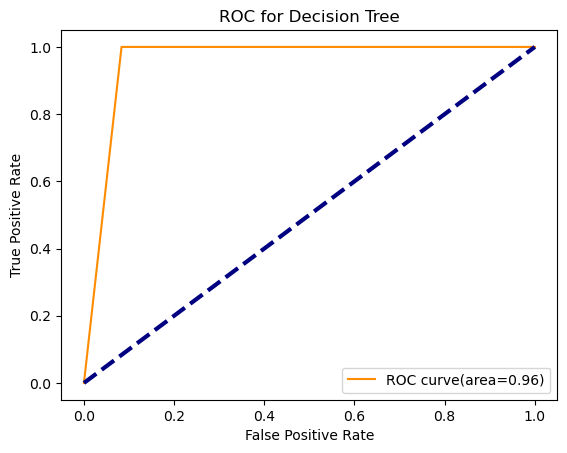

In [99]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(model_2_test_pred,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Decision Tree')
plt.legend(loc='lower right')
plt.show()

# Ensemble using RandomForest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
model3=RandomForestClassifier()

In [102]:
model3.fit(x_train,y_train)

RandomForestClassifier()

In [103]:
model_3_train_pred=model3.predict(x_train)

In [104]:
model_3_test_pred=model3.predict(x_test)

In [105]:
print(classification_report(y_train,model_3_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00       126

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



In [135]:
print(classification_report(y_test,model_3_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.93      0.96      0.95        28

    accuracy                           0.92        39
   macro avg       0.92      0.89      0.90        39
weighted avg       0.92      0.92      0.92        39



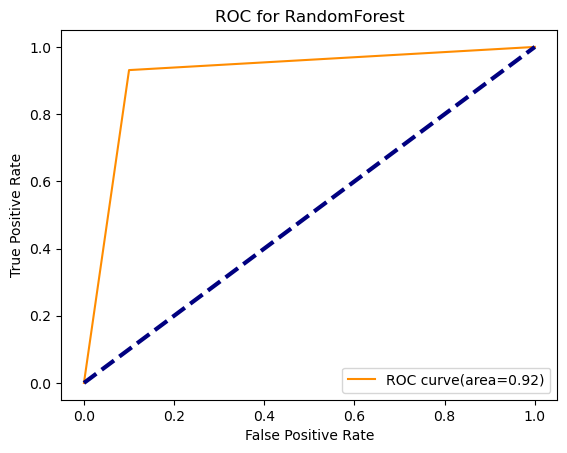

In [107]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(model_3_test_pred,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for RandomForest')
plt.legend(loc='lower right')
plt.show()

In [108]:
from sklearn.svm import SVC
model4=SVC(random_state=40)

In [109]:
model4.fit(x_train,y_train)  ###training our data

SVC(random_state=40)

In [110]:
model_4_train_pred=model4.predict(x_train)

In [111]:
model_4_test_pred=model4.predict(x_test)

In [112]:
print(classification_report(y_train,model_4_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        29
           1       0.98      0.98      0.98       126

    accuracy                           0.97       155
   macro avg       0.96      0.96      0.96       155
weighted avg       0.97      0.97      0.97       155



In [113]:
print(classification_report(y_test,model_4_test_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.96      0.98        28

    accuracy                           0.97        39
   macro avg       0.96      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39



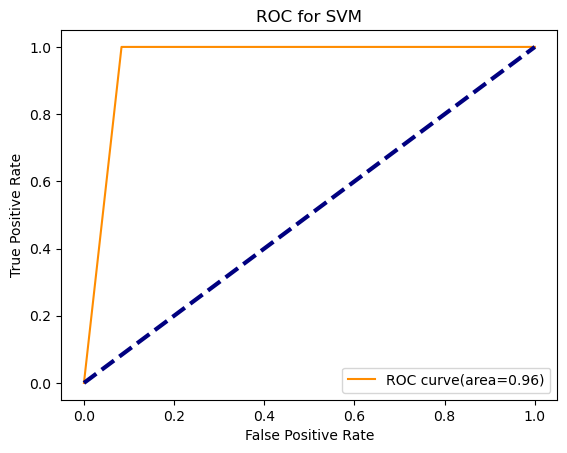

In [114]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(model_4_test_pred,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for SVM')
plt.legend(loc='lower right')
plt.show()

In [115]:
from sklearn.neighbors import KNeighborsClassifier
model5=KNeighborsClassifier(n_neighbors=5)


In [116]:
model5.fit(x_train,y_train)

KNeighborsClassifier()

In [117]:
model_5_train_pred=model5.predict(x_train)

In [118]:
model_5_test_pred=model5.predict(x_test)

In [119]:
print(classification_report(y_train,model_5_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        29
           1       0.97      0.98      0.98       126

    accuracy                           0.96       155
   macro avg       0.95      0.92      0.93       155
weighted avg       0.96      0.96      0.96       155



In [120]:
print(classification_report(y_test,model_4_test_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.96      0.98        28

    accuracy                           0.97        39
   macro avg       0.96      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39



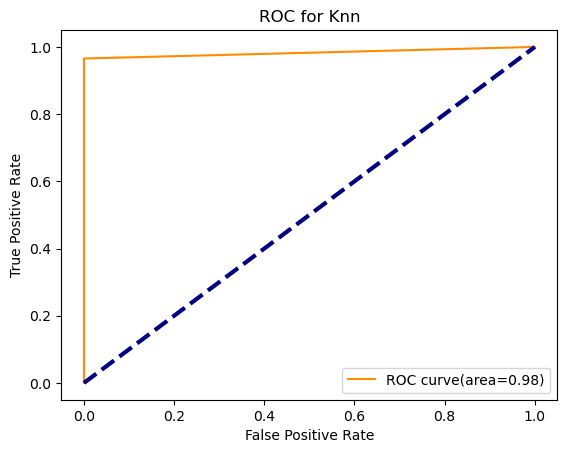

In [121]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(model_5_test_pred,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Knn')
plt.legend(loc='lower right')
plt.show()

From the above all model we can conclude Knn Classifier gives accuracy 98%.

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
dict={"n_estimators":[50,100,200],
      "max_depth":[2,4],
      "min_samples_split":[2,5],
      "bootstrap":[True,False],
      "criterion":["gini","entropy","log_loss"]}
      #,"max_fetaures":['sqrt','log2']}

In [124]:
dict2={"algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],"weights":['uniform', 'distance']}

In [125]:
gd=GridSearchCV(estimator=model5,param_grid=dict2,cv=5)

In [126]:
gd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'weights': ['uniform', 'distance']})

In [127]:
gd.best_params_

{'algorithm': 'auto', 'weights': 'distance'}

In [128]:
gd.best_score_

0.9548387096774194

In [129]:
gd.fit(x_test,y_test)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'weights': ['uniform', 'distance']})

In [130]:
gd.best_params_

{'algorithm': 'auto', 'weights': 'uniform'}

In [131]:
gd.best_score_

0.8964285714285714

In [134]:
import pickle
filename="GlassIdentification.pkl"
pickle.dump(model5,open(filename,'wb'))

CONCLUSION:
    FROM THE ABOVE OPERATIONS,WE CAN CONCLUDE Knn CLASSIFIER PREDICTS GOOD ACCURACY OF ABOUT 98%.